In [1]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 97.4 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#  read data 
df = pd.read_csv('/kaggle/input/cairo-whether/Cairo-Weather.csv',parse_dates=['time'])

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),...,dew_point_2m_mean (°C),relative_humidity_2m_mean (%),visibility_mean (undefined),visibility_max (undefined),visibility_min (undefined),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
0,2009-02-01,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,...,0.7,42,NaN,NaN,NaN,17.1,8.8,215,10.8,5.7
1,2009-02-02,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,...,1.1,45,NaN,NaN,NaN,15.1,7.5,74,7.9,1.1
2,2009-02-03,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,...,2.4,43,NaN,NaN,NaN,27.8,15.0,65,17.3,9.0
3,2009-02-04,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,...,4.0,46,NaN,NaN,NaN,18.9,8.8,90,9.7,0.4
4,2009-02-05,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,...,-1.6,31,NaN,NaN,NaN,19.9,10.0,222,11.9,6.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   time                             5845 non-null   datetime64[ns]
 1   temperature_2m_mean (°C)         5845 non-null   float64       
 2   rain_sum (mm)                    5845 non-null   float64       
 3   wind_speed_10m_max (km/h)        5845 non-null   float64       
 4   apparent_temperature_mean (°C)   5845 non-null   float64       
 5   temperature_2m_min (°C)          5845 non-null   float64       
 6   temperature_2m_max (°C)          5845 non-null   float64       
 7   apparent_temperature_max (°C)    5845 non-null   float64       
 8   weather_code (wmo code)          5845 non-null   int64         
 9   wind_direction_10m_dominant (°)  5845 non-null   int64         
 10  wind_gusts_10m_max (km/h)        5845 non-null   float64    

In [6]:
 df['rain_sum (mm)'].value_counts()

rain_sum (mm)
0.0     5449
0.1      102
0.2       50
0.3       35
0.4       28
0.5       25
0.7       22
0.6       17
0.8       16
1.1        9
1.0        6
1.5        6
1.3        6
1.2        5
2.9        4
1.8        4
1.6        4
2.0        3
2.5        3
2.4        3
2.2        3
3.2        3
1.4        3
0.9        2
5.4        2
8.2        2
4.4        2
3.1        2
2.1        2
1.7        2
3.8        2
3.5        2
4.2        2
1.9        2
4.6        1
10.0       1
8.0        1
2.6        1
5.2        1
4.3        1
6.9        1
3.7        1
43.1       1
9.9        1
3.3        1
11.0       1
11.1       1
4.9        1
9.2        1
5.9        1
8.9        1
Name: count, dtype: int64

In [7]:
df['rain_flag'] = (df['rain_sum (mm)'] >0).astype(int)

In [8]:
df['rain_flag'].value_counts()

rain_flag
0    5449
1     396
Name: count, dtype: int64

In [9]:
df.columns

Index(['time', 'temperature_2m_mean (°C)', 'rain_sum (mm)',
       'wind_speed_10m_max (km/h)', 'apparent_temperature_mean (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_max (°C)',
       'apparent_temperature_max (°C)', 'weather_code (wmo code)',
       'wind_direction_10m_dominant (°)', 'wind_gusts_10m_max (km/h)',
       'shortwave_radiation_sum (MJ/m²)', 'daylight_duration (s)',
       'sunshine_duration (s)', 'apparent_temperature_min (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)', 'precipitation_hours (h)',
       'precipitation_sum (mm)', 'et0_fao_evapotranspiration (mm)',
       'snowfall_sum (cm)', 'cloud_cover_mean (%)', 'dew_point_2m_mean (°C)',
       'relative_humidity_2m_mean (%)', 'visibility_mean (undefined)',
       'visibility_max (undefined)', 'visibility_min (undefined)',
       'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)',
       'winddirection_10m_dominant (°)', 'wind_gusts_10m_min (km/h)',
       'wind_speed_10m_min (km/h)', 'rain_f

In [10]:
df.drop(columns=['visibility_mean (undefined)',
       'visibility_max (undefined)', 
        'visibility_min (undefined)'],inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   time                             5845 non-null   datetime64[ns]
 1   temperature_2m_mean (°C)         5845 non-null   float64       
 2   rain_sum (mm)                    5845 non-null   float64       
 3   wind_speed_10m_max (km/h)        5845 non-null   float64       
 4   apparent_temperature_mean (°C)   5845 non-null   float64       
 5   temperature_2m_min (°C)          5845 non-null   float64       
 6   temperature_2m_max (°C)          5845 non-null   float64       
 7   apparent_temperature_max (°C)    5845 non-null   float64       
 8   weather_code (wmo code)          5845 non-null   int64         
 9   wind_direction_10m_dominant (°)  5845 non-null   int64         
 10  wind_gusts_10m_max (km/h)        5845 non-null   float64    

# extract time features

In [12]:
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['year'] = df['time'].dt.year
df['dayofyear'] = df['time'].dt.dayofyear

In [13]:
df.head()

,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),...,wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h),rain_flag,month,day,year,dayofyear
0,2009-02-01,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,...,17.1,8.8,215,10.8,5.7,0,2,1,2009,32
1,2009-02-02,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,...,15.1,7.5,74,7.9,1.1,0,2,2,2009,33
2,2009-02-03,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,...,27.8,15.0,65,17.3,9.0,0,2,3,2009,34
3,2009-02-04,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,...,18.9,8.8,90,9.7,0.4,0,2,4,2009,35
4,2009-02-05,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,...,19.9,10.0,222,11.9,6.5,0,2,5,2009,36


In [14]:
# make season
# Season: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall
df['season'] = ((df['month'] % 12 + 3) // 3).astype(int)

<Axes: title={'center': 'Average Monthly Temperature'}, xlabel='month'>

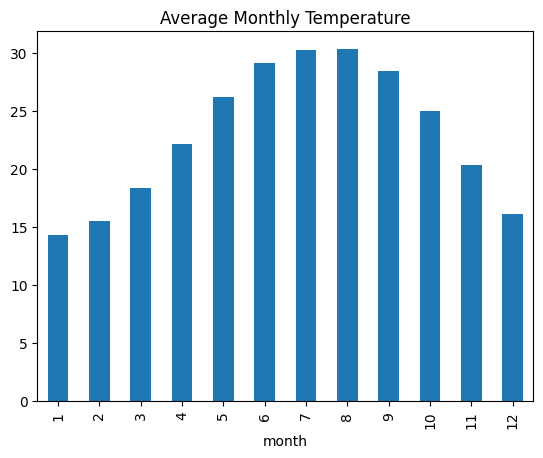

In [15]:
monthly_temp = df.groupby('month')['temperature_2m_mean (°C)'].mean()
monthly_temp.plot(kind='bar', title='Average Monthly Temperature')


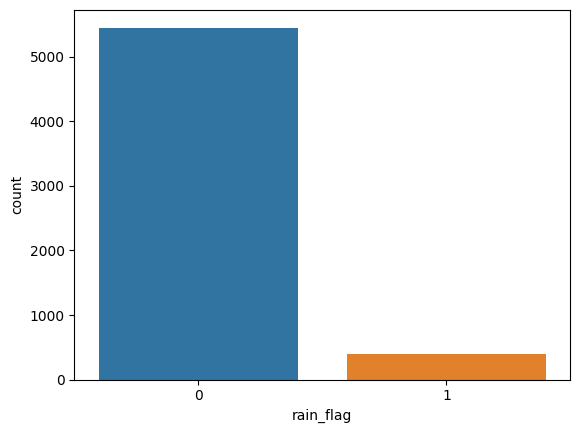

In [16]:
sns.countplot(data = df, x='rain_flag')
plt.show()
# imbalance class

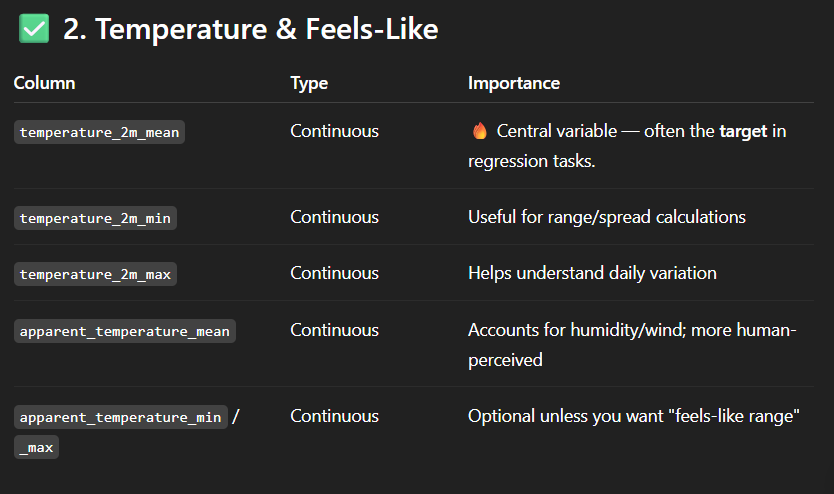

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   time                             5845 non-null   datetime64[ns]
 1   temperature_2m_mean (°C)         5845 non-null   float64       
 2   rain_sum (mm)                    5845 non-null   float64       
 3   wind_speed_10m_max (km/h)        5845 non-null   float64       
 4   apparent_temperature_mean (°C)   5845 non-null   float64       
 5   temperature_2m_min (°C)          5845 non-null   float64       
 6   temperature_2m_max (°C)          5845 non-null   float64       
 7   apparent_temperature_max (°C)    5845 non-null   float64       
 8   weather_code (wmo code)          5845 non-null   int64         
 9   wind_direction_10m_dominant (°)  5845 non-null   int64         
 10  wind_gusts_10m_max (km/h)        5845 non-null   float64    

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

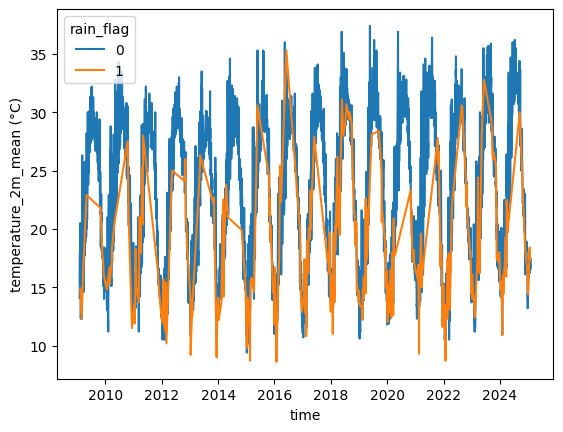

In [18]:
# Temperature Over Time 
sns.lineplot(x='time',y='temperature_2m_mean (°C)',data=df,hue = 'rain_flag')
plt.show()

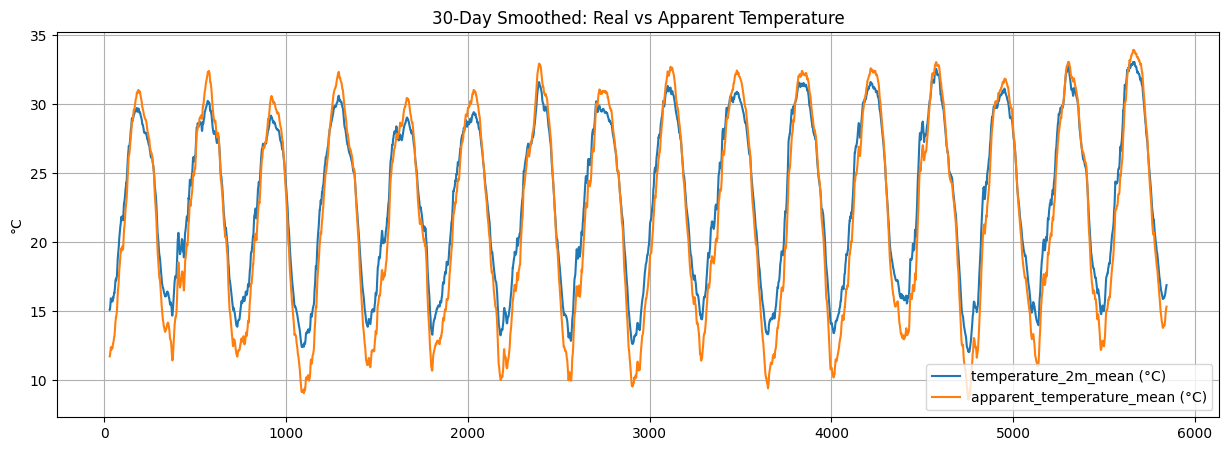

In [19]:
#  Apparent Temperature vs Real Temperature
df[['temperature_2m_mean (°C)','apparent_temperature_mean (°C)']].rolling(30).mean().plot(figsize=(15,5))
plt.title("30-Day Smoothed: Real vs Apparent Temperature")
plt.ylabel("°C")
plt.grid()

<Axes: title={'center': 'Daily Mean Temperature'}, xlabel='time'>

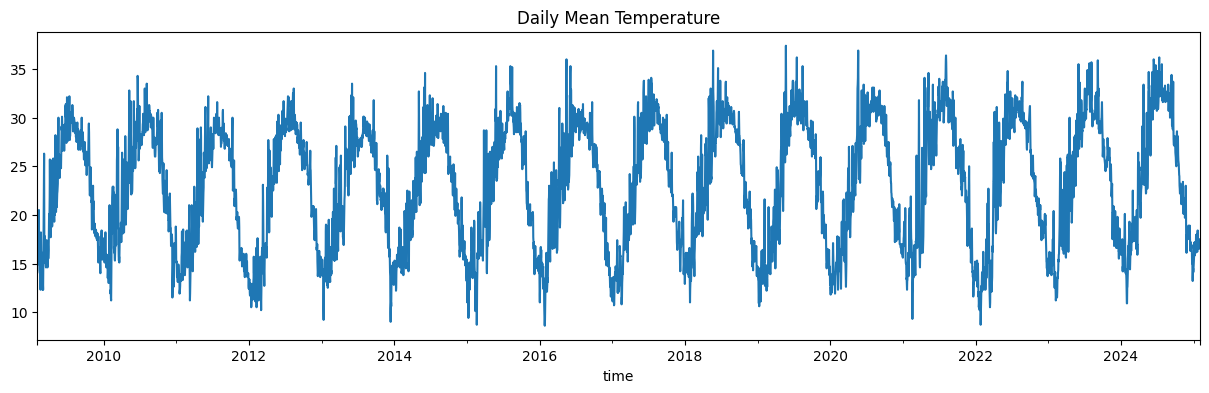

In [20]:
df.set_index('time')['temperature_2m_mean (°C)'].plot(figsize=(15, 4), title='Daily Mean Temperature')


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


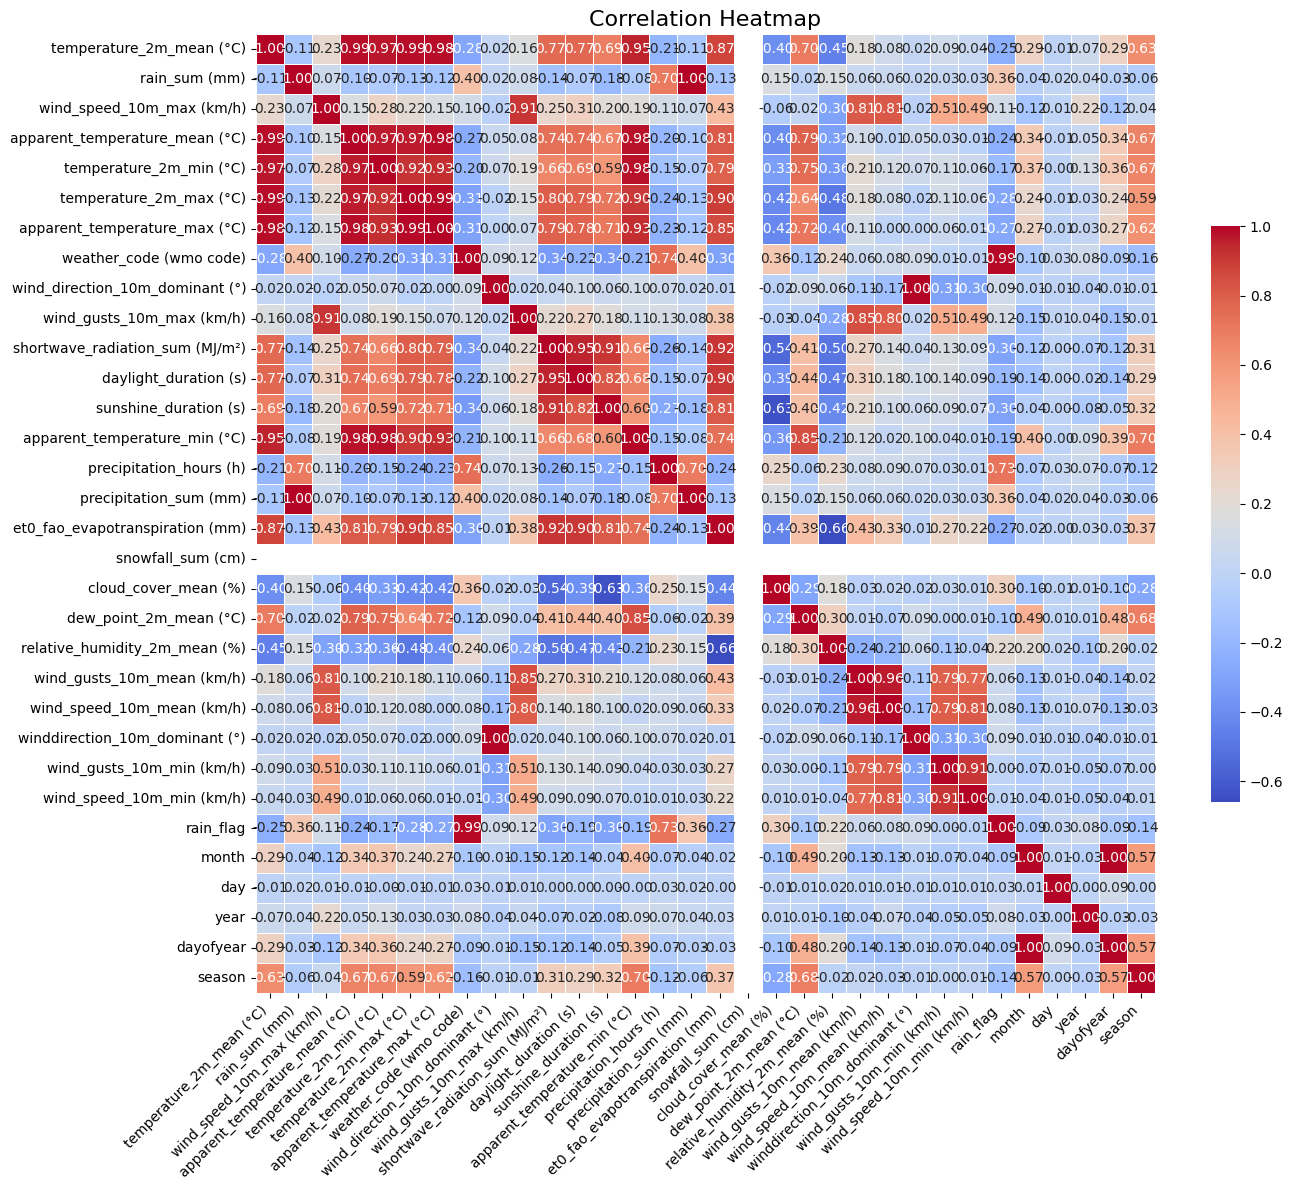

In [21]:
# correlation
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr,cmap ='coolwarm',annot = True,fmt='0.2f',linewidths =0.5,cbar_kws ={'shrink':0.6})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

🔻 Drop these due to high redundancy:
apparent_temperature_mean (°C)

apparent_temperature_max (°C)

daylight_duration (s)

wind_speed_10m_min (km/h)

wind_gusts_10m_max (km/h)

🔍 Keep these if predicting rain_flag:
precipitation_hours

cloud_cover_mean

sunshine_duration

shortwave_radiation_sum

🔍 Keep these if predicting temperature:
dew_point_2m_mean

shortwave_radiation_sum

et0_fao_evapotranspiration

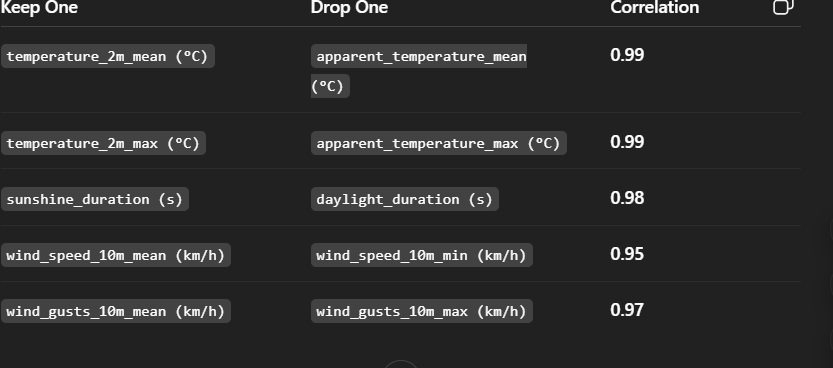
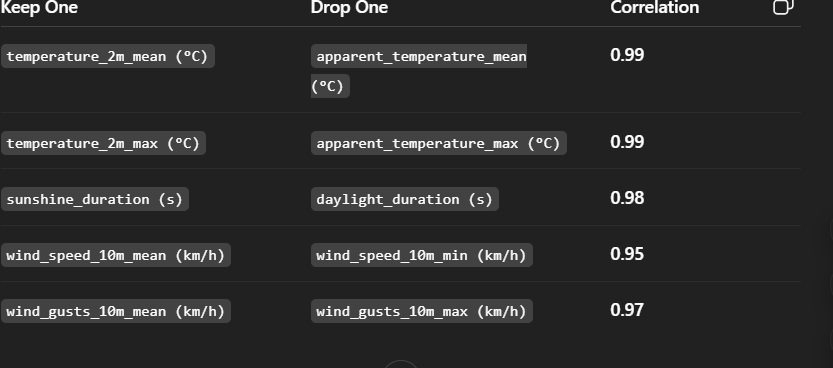
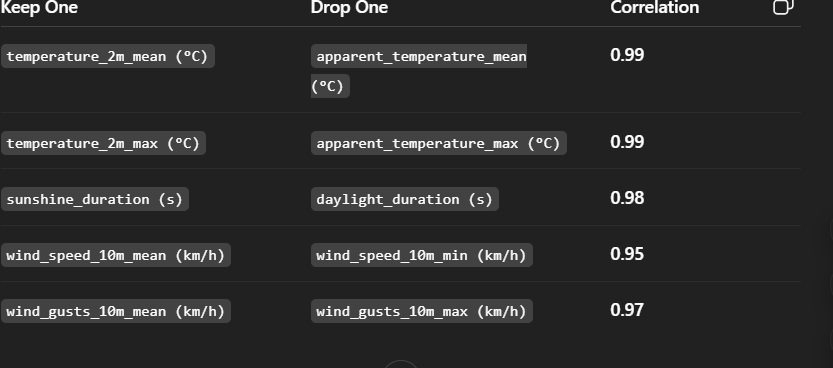

In [22]:
# temp trend  of time /rain_flag

In [23]:
# apparent_temp over time /rain_flag

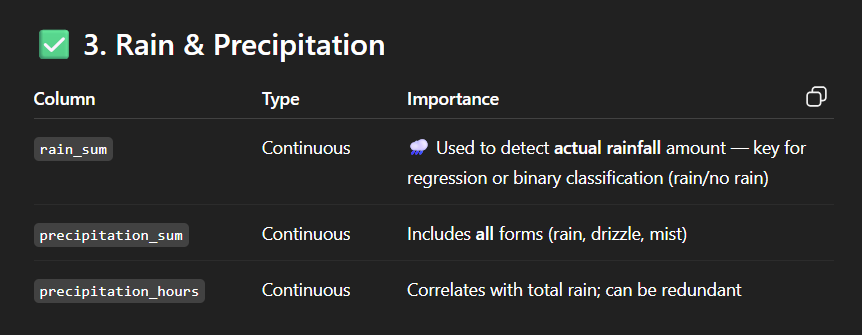

In [24]:
# relation beteween rain[parciptation_sum / hours ]  with rain flag / time / temp

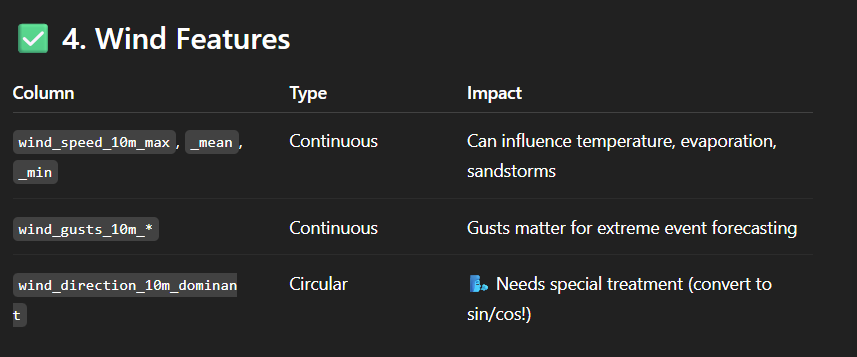

In [25]:
# trend speed with season  and rain flag over time 

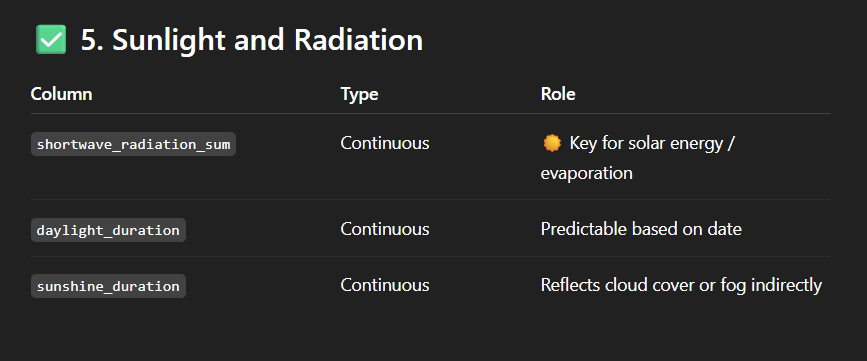

In [26]:
# pattern between  season and rain flag and temp  

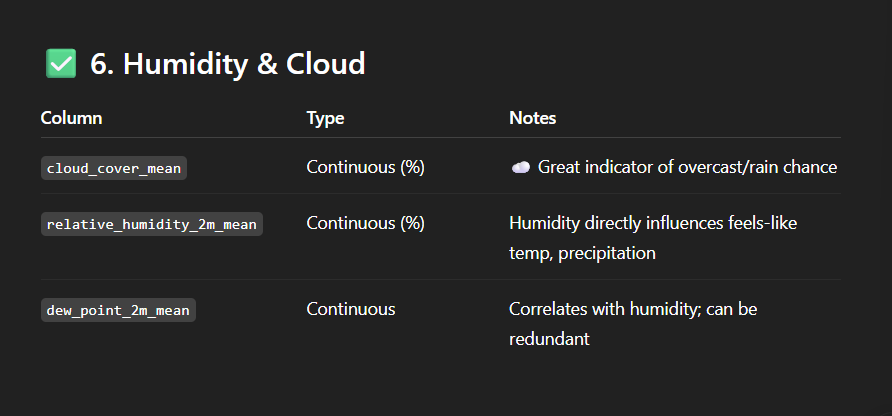

In [27]:
# trend humidity and cloud over time hue rain flag 

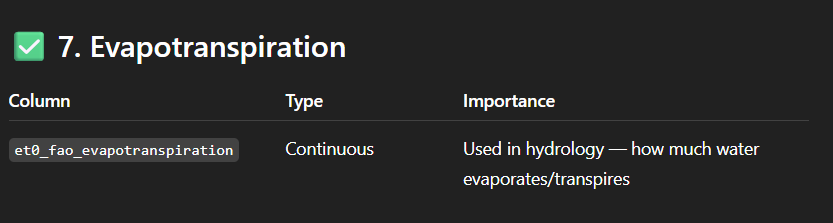

In [28]:
# show correlation between cloud cover mean  and evaportation 

In [29]:
# show the evaporation trend [analysis with time ]

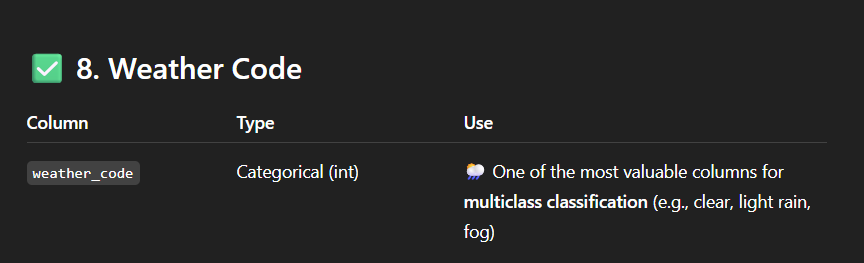

# preprocessing 

In [30]:
df.isnull().sum()

time                               0
temperature_2m_mean (°C)           0
rain_sum (mm)                      0
wind_speed_10m_max (km/h)          0
apparent_temperature_mean (°C)     0
temperature_2m_min (°C)            0
temperature_2m_max (°C)            0
apparent_temperature_max (°C)      0
weather_code (wmo code)            0
wind_direction_10m_dominant (°)    0
wind_gusts_10m_max (km/h)          0
shortwave_radiation_sum (MJ/m²)    0
daylight_duration (s)              0
sunshine_duration (s)              0
apparent_temperature_min (°C)      0
sunrise (iso8601)                  0
sunset (iso8601)                   0
precipitation_hours (h)            0
precipitation_sum (mm)             0
et0_fao_evapotranspiration (mm)    0
snowfall_sum (cm)                  0
cloud_cover_mean (%)               0
dew_point_2m_mean (°C)             0
relative_humidity_2m_mean (%)      0
wind_gusts_10m_mean (km/h)         0
wind_speed_10m_mean (km/h)         0
winddirection_10m_dominant (°)     0
w

In [31]:
df.duplicated().sum()

0

Distrubution for temperature_2m_mean (°C)


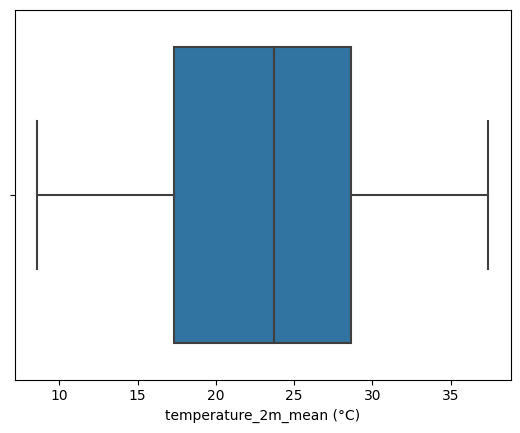

Distrubution for rain_sum (mm)


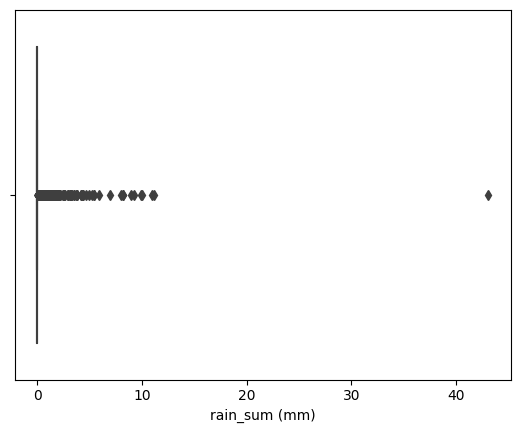

Distrubution for wind_speed_10m_max (km/h)


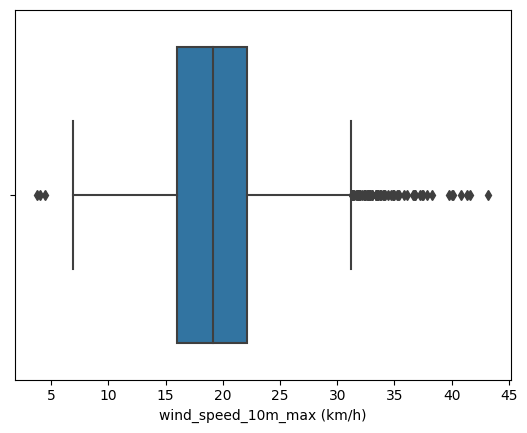

Distrubution for apparent_temperature_mean (°C)


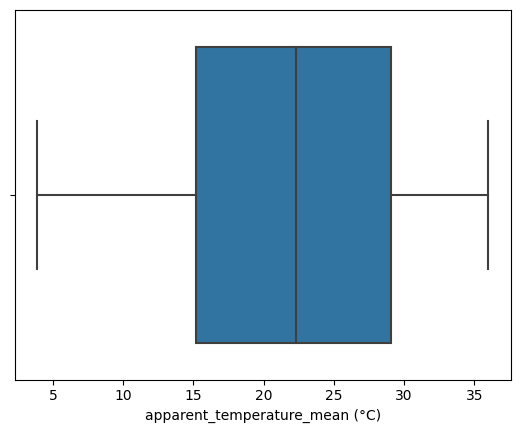

Distrubution for temperature_2m_min (°C)


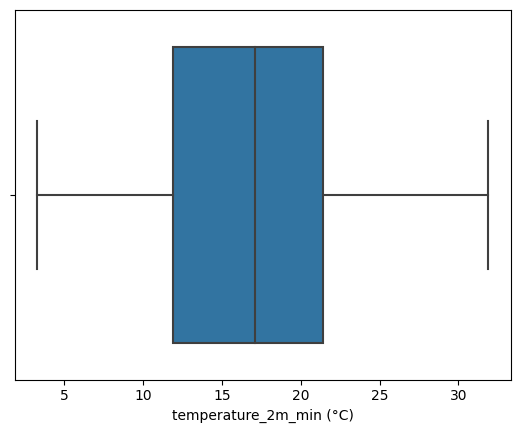

Distrubution for temperature_2m_max (°C)


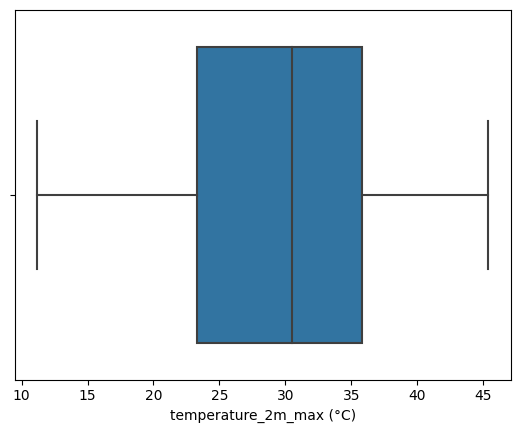

Distrubution for apparent_temperature_max (°C)


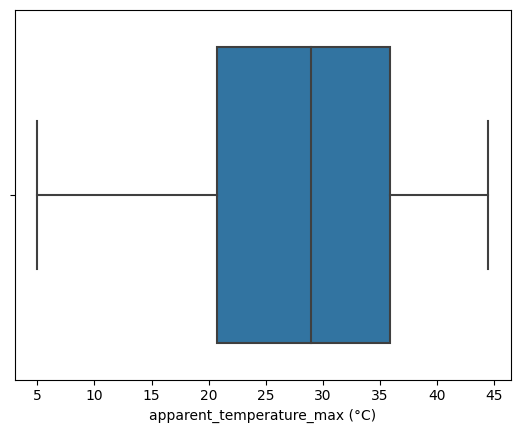

Distrubution for weather_code (wmo code)


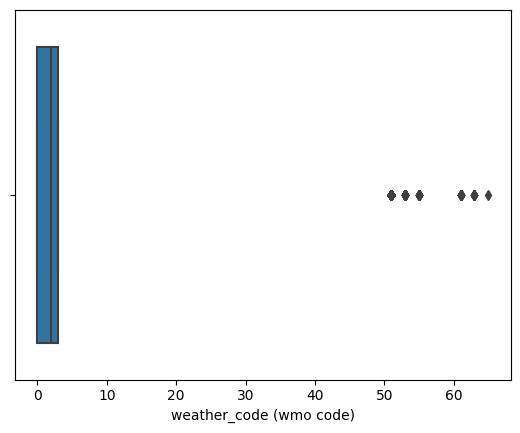

Distrubution for wind_direction_10m_dominant (°)


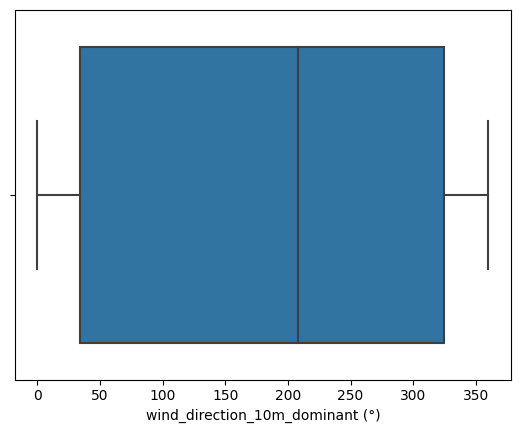

Distrubution for wind_gusts_10m_max (km/h)


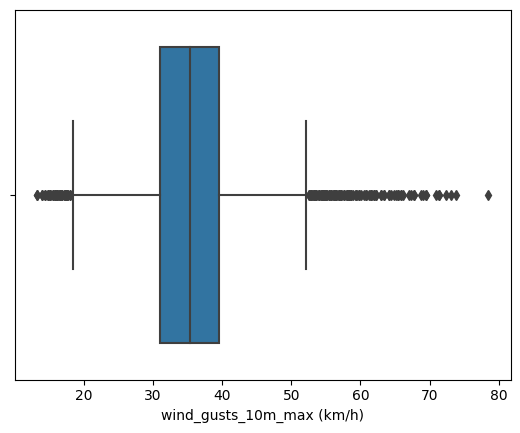

Distrubution for shortwave_radiation_sum (MJ/m²)


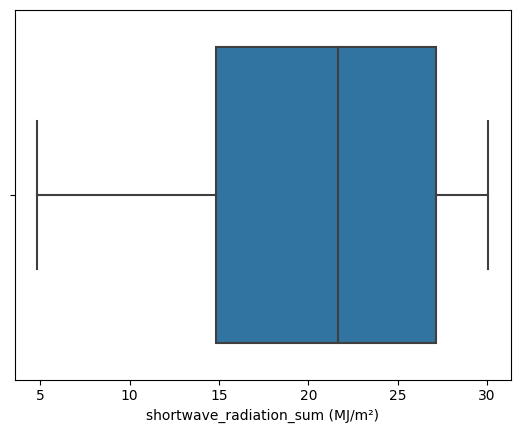

Distrubution for daylight_duration (s)


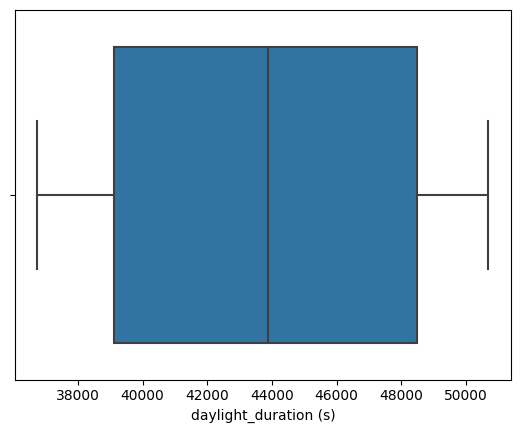

Distrubution for sunshine_duration (s)


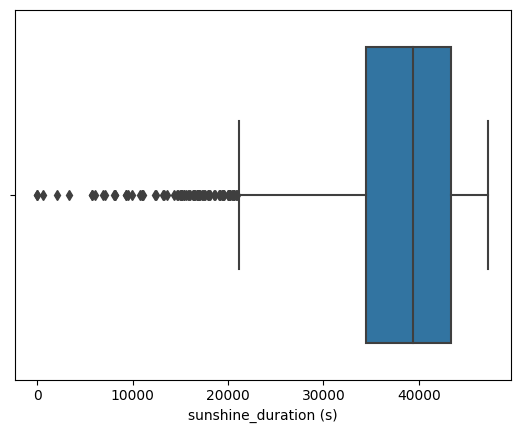

Distrubution for apparent_temperature_min (°C)


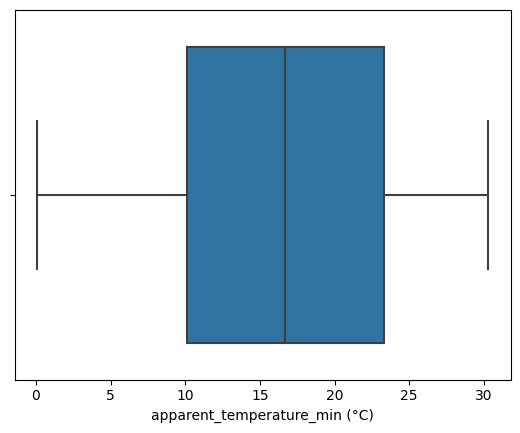

Distrubution for precipitation_hours (h)


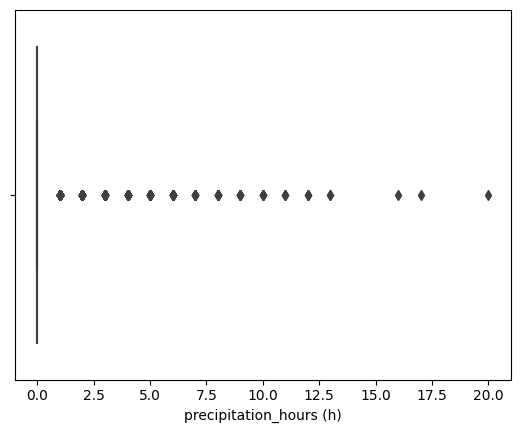

Distrubution for precipitation_sum (mm)


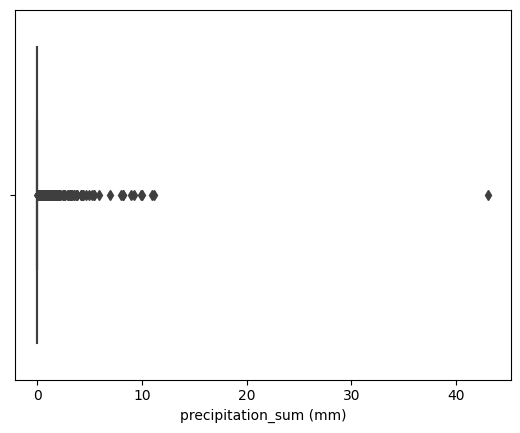

Distrubution for et0_fao_evapotranspiration (mm)


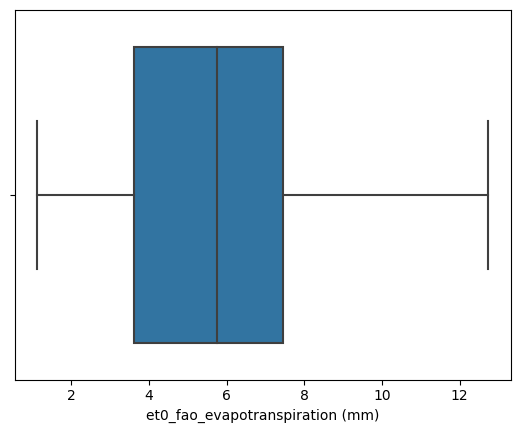

Distrubution for snowfall_sum (cm)


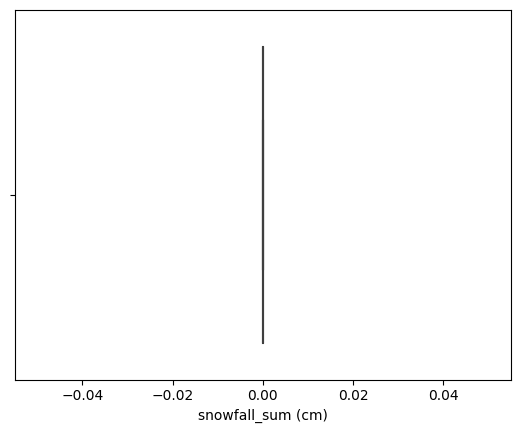

Distrubution for cloud_cover_mean (%)


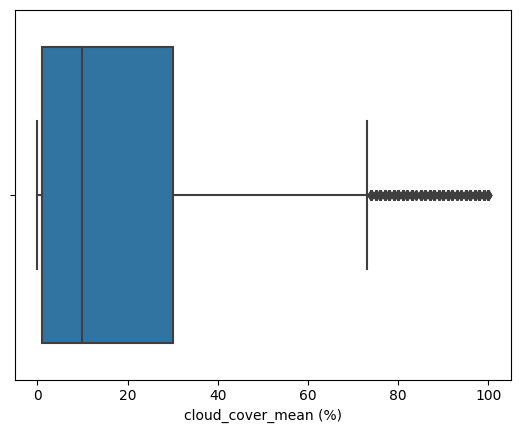

Distrubution for dew_point_2m_mean (°C)


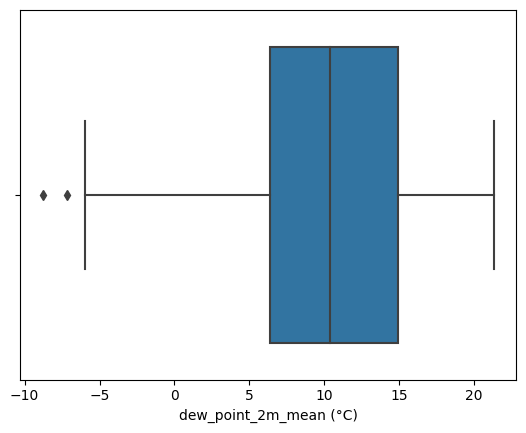

Distrubution for relative_humidity_2m_mean (%)


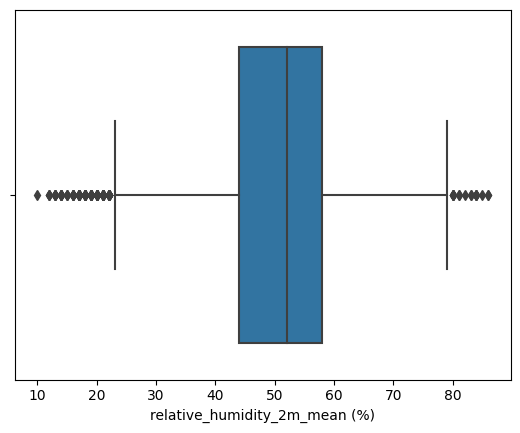

Distrubution for wind_gusts_10m_mean (km/h)


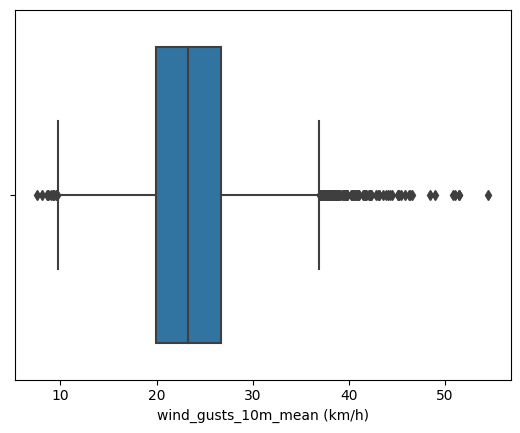

Distrubution for wind_speed_10m_mean (km/h)


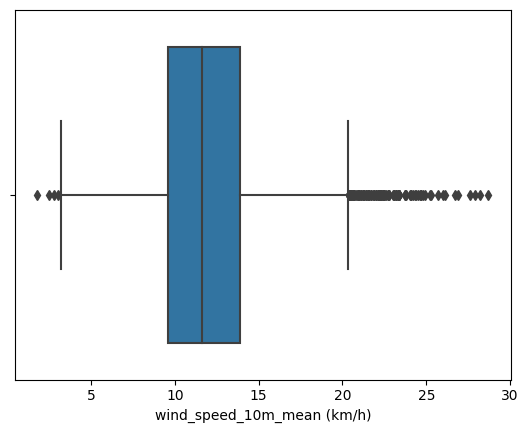

Distrubution for winddirection_10m_dominant (°)


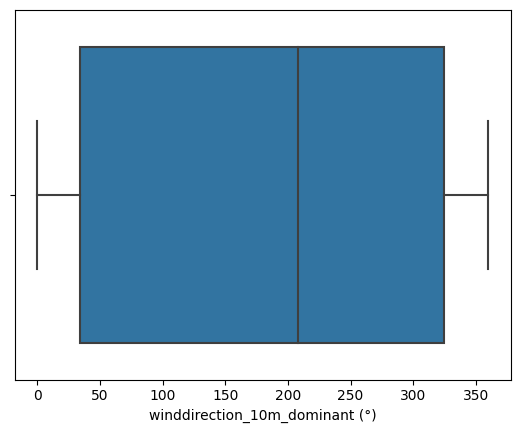

Distrubution for wind_gusts_10m_min (km/h)


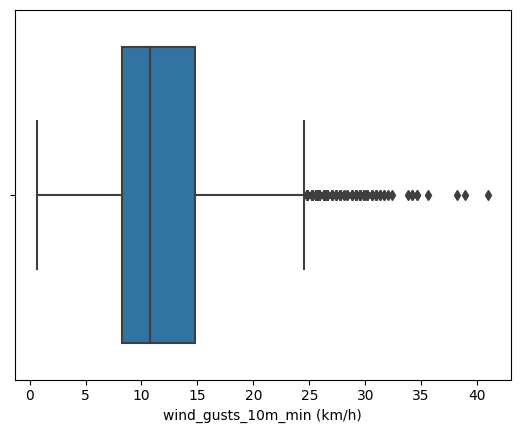

Distrubution for wind_speed_10m_min (km/h)


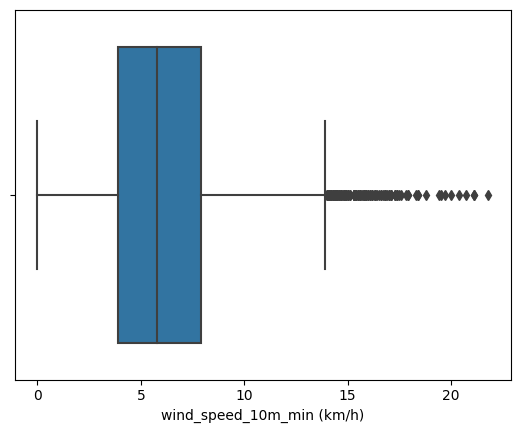

Distrubution for rain_flag


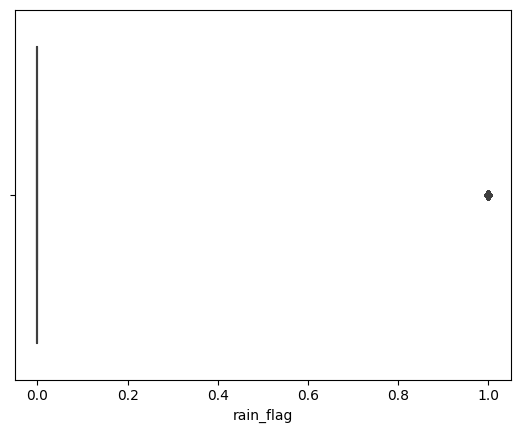

Distrubution for month


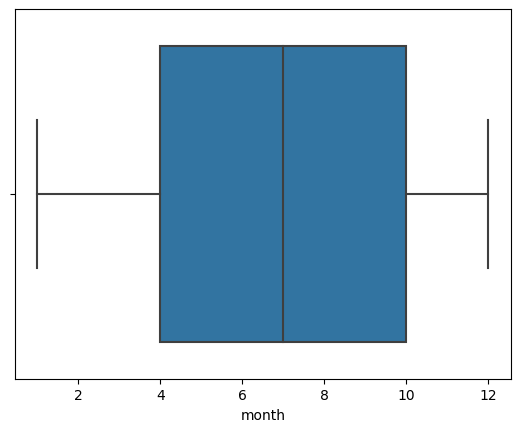

Distrubution for day


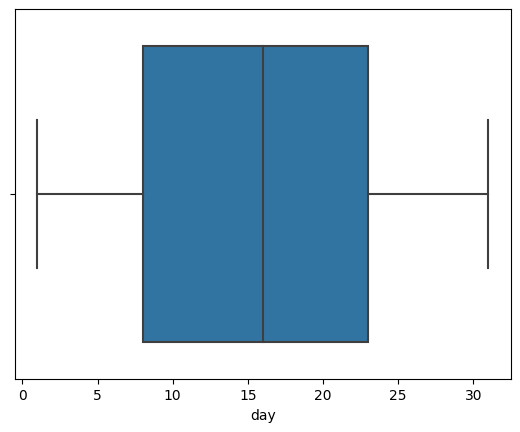

Distrubution for year


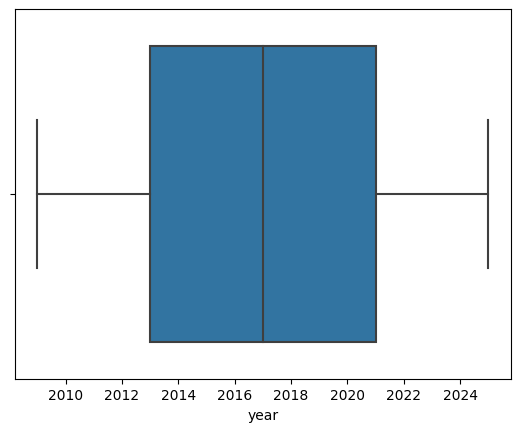

Distrubution for dayofyear


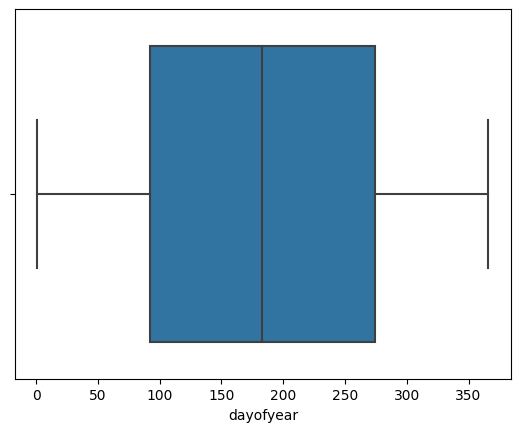

Distrubution for season


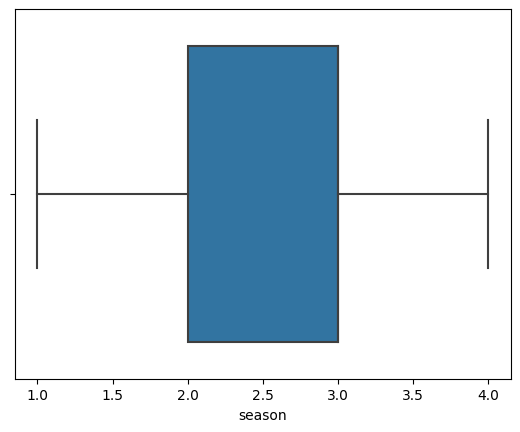

In [32]:
for col in df.select_dtypes(include ='number').columns:
    print(f'Distrubution for {col}')
    sns.boxplot(x=col , data =df)
    plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   time                             5845 non-null   datetime64[ns]
 1   temperature_2m_mean (°C)         5845 non-null   float64       
 2   rain_sum (mm)                    5845 non-null   float64       
 3   wind_speed_10m_max (km/h)        5845 non-null   float64       
 4   apparent_temperature_mean (°C)   5845 non-null   float64       
 5   temperature_2m_min (°C)          5845 non-null   float64       
 6   temperature_2m_max (°C)          5845 non-null   float64       
 7   apparent_temperature_max (°C)    5845 non-null   float64       
 8   weather_code (wmo code)          5845 non-null   int64         
 9   wind_direction_10m_dominant (°)  5845 non-null   int64         
 10  wind_gusts_10m_max (km/h)        5845 non-null   float64    

In [34]:
df.drop(columns =['apparent_temperature_mean (°C)','apparent_temperature_max (°C)','daylight_duration (s)','wind_speed_10m_min (km/h)','wind_gusts_10m_max (km/h)'],inplace= True)

In [35]:
df['rain_prev_1d'] = df['rain_sum (mm)'].shift(1)
df['avg_temp_past_7d'] = df['temperature_2m_mean (°C)'].rolling(7).mean()


In [36]:
df.dropna(inplace = True)

In [37]:
df['rain_flag'].value_counts(normalize=True)


rain_flag
0    0.93218
1    0.06782
Name: proportion, dtype: float64

In [38]:
# Fix the column reference (remove extra space)
df['wind_dir_sin'] = np.sin(np.deg2rad(df['wind_direction_10m_dominant (°)']))
df['wind_dir_cos'] = np.cos(np.deg2rad(df['wind_direction_10m_dominant (°)']))

# Then drop the original column
df.drop(columns=['wind_direction_10m_dominant (°)'], inplace=True)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5839 entries, 6 to 5844
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   time                             5839 non-null   datetime64[ns]
 1   temperature_2m_mean (°C)         5839 non-null   float64       
 2   rain_sum (mm)                    5839 non-null   float64       
 3   wind_speed_10m_max (km/h)        5839 non-null   float64       
 4   temperature_2m_min (°C)          5839 non-null   float64       
 5   temperature_2m_max (°C)          5839 non-null   float64       
 6   weather_code (wmo code)          5839 non-null   int64         
 7   shortwave_radiation_sum (MJ/m²)  5839 non-null   float64       
 8   sunshine_duration (s)            5839 non-null   float64       
 9   apparent_temperature_min (°C)    5839 non-null   float64       
 10  sunrise (iso8601)                5839 non-null   object        
 

In [40]:
df.isnull().sum()

time                               0
temperature_2m_mean (°C)           0
rain_sum (mm)                      0
wind_speed_10m_max (km/h)          0
temperature_2m_min (°C)            0
temperature_2m_max (°C)            0
weather_code (wmo code)            0
shortwave_radiation_sum (MJ/m²)    0
sunshine_duration (s)              0
apparent_temperature_min (°C)      0
sunrise (iso8601)                  0
sunset (iso8601)                   0
precipitation_hours (h)            0
precipitation_sum (mm)             0
et0_fao_evapotranspiration (mm)    0
snowfall_sum (cm)                  0
cloud_cover_mean (%)               0
dew_point_2m_mean (°C)             0
relative_humidity_2m_mean (%)      0
wind_gusts_10m_mean (km/h)         0
wind_speed_10m_mean (km/h)         0
winddirection_10m_dominant (°)     0
wind_gusts_10m_min (km/h)          0
rain_flag                          0
month                              0
day                                0
year                               0
d

In [77]:
if 'rain_prev_1d' in df.columns:
    df.drop(columns=['rain_prev_1d'], inplace=True)


In [78]:
if 'rain_sum (mm)' in df.columns:
    df.drop(columns=['rain_sum (mm)'], inplace=True)


In [79]:
print("Sanity check:")
print(set(x_rain.columns) - set(features_rain))  # should return empty set


Sanity check:
set()


In [80]:
# for rain_flag classification
# features_rain = [
#     'temperature_2m_mean (°C)',
#     'wind_speed_10m_max (km/h)',
#     'weather_code (wmo code)',
#     'precipitation_hours (h)',
#     'precipitation_sum (mm)',
#     'cloud_cover_mean (%)',
#     'sunshine_duration (s)',
#     'shortwave_radiation_sum (MJ/m²)',
#     'relative_humidity_2m_mean (%)',
#     'wind_gusts_10m_mean (km/h)',
#     'wind_speed_10m_mean (km/h)',
#     'wind_dir_sin',
#     'wind_dir_cos',
#     'month',
#     'season',
#     'rain_prev_1d',
# ]

#  for temp prediction
features_temp = [
    'rain_flag',  # output from Stage 1
    'dew_point_2m_mean (°C)',
    'shortwave_radiation_sum (MJ/m²)',
    'et0_fao_evapotranspiration (mm)',
    'precipitation_hours (h)',
    'cloud_cover_mean (%)',
    'sunshine_duration (s)',
    'wind_speed_10m_mean (km/h)',
    'wind_dir_sin',
    'wind_dir_cos',
    'month',
    'season',
    'avg_temp_past_7d'
]

In [92]:
features_rain = [
    'temperature_2m_mean (°C)',
    'wind_speed_10m_max (km/h)',
    'cloud_cover_mean (%)',
    'sunshine_duration (s)',
    'shortwave_radiation_sum (MJ/m²)',
    'relative_humidity_2m_mean (%)',
    'wind_gusts_10m_mean (km/h)',
    'wind_speed_10m_mean (km/h)',
    'wind_dir_sin',
    'wind_dir_cos',
    'month',
    'season'
]

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_rain = df[features_rain]
y_rain = df['rain_flag']

x_train_rain, x_test_rain, y_train_rain, y_test_rain = train_test_split(
    x_rain, y_rain,
    test_size=0.2,
    stratify=y_rain,
    random_state=7
)



# Standard scaling
scaler_rain = StandardScaler()
x_train_rain_scaled = scaler_rain.fit_transform(x_train_rain)
x_test_rain_scaled = scaler_rain.transform(x_test_rain)

In [94]:
x_rain.columns

Index(['temperature_2m_mean (°C)', 'wind_speed_10m_max (km/h)',
       'cloud_cover_mean (%)', 'sunshine_duration (s)',
       'shortwave_radiation_sum (MJ/m²)', 'relative_humidity_2m_mean (%)',
       'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)',
       'wind_dir_sin', 'wind_dir_cos', 'month', 'season'],
      dtype='object')

In [95]:
y_train_rain.value_counts()

rain_flag
0    4354
1     317
Name: count, dtype: int64

In [60]:
# !pip install --upgrade scikit-learn imbalanced-learn --quiet


In [96]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7)
x_train_rain_balanced, y_train_rain_balanced = smote.fit_resample(x_train_rain_scaled, y_train_rain)

In [97]:
y_train_rain_balanced.value_counts()

rain_flag
0    4354
1    4354
Name: count, dtype: int64

In [98]:
#  for temp prediction
x_temp = df[features_temp]  # include real 'rain_flag' during training
y_temp = df['temperature_2m_mean (°C)']

# split temp feature 
x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(
    x_temp, y_temp,
    test_size=0.2,
    stratify=y_rain,  
    random_state=7
)


scaler_temp = StandardScaler()
x_train_temp_scaled = scaler_temp.fit_transform(x_train_temp)
x_test_temp_scaled = scaler_temp.transform(x_test_temp)

# Classical MOdel

In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [100]:
model_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=7
)

model_xgb.fit(x_train_rain_balanced, y_train_rain_balanced)
print("Model trained successfully.")



Model trained successfully.


In [65]:
print(model_xgb.get_params())


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 7, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


In [101]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
y_test_pred = model_xgb.predict(x_test_rain_scaled)

# Report
print("Rain Classification Report (Test Set):")
print(classification_report(y_test_rain, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_rain, y_test_pred):.4f}")


Rain Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1089
           1       0.35      0.72      0.47        79

    accuracy                           0.89      1168
   macro avg       0.66      0.81      0.71      1168
weighted avg       0.94      0.89      0.91      1168

Accuracy: 0.8913


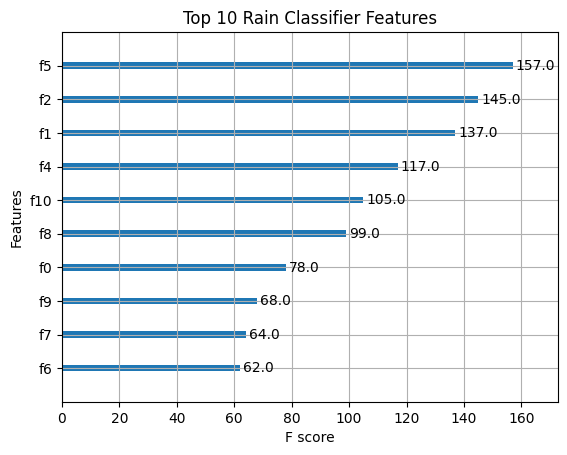

In [102]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model_xgb, max_num_features=10)
plt.title("Top 10 Rain Classifier Features")
plt.show()


In [90]:
print("Used features:")
print(features_rain)

print("Training matrix columns:")
print(x_train_rain.columns.tolist())  # or use DataFrame before scaling


Used features:
['temperature_2m_mean (°C)', 'wind_speed_10m_max (km/h)', 'weather_code (wmo code)', 'cloud_cover_mean (%)', 'sunshine_duration (s)', 'shortwave_radiation_sum (MJ/m²)', 'relative_humidity_2m_mean (%)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'wind_dir_sin', 'wind_dir_cos', 'month', 'season']
Training matrix columns:
['temperature_2m_mean (°C)', 'wind_speed_10m_max (km/h)', 'weather_code (wmo code)', 'cloud_cover_mean (%)', 'sunshine_duration (s)', 'shortwave_radiation_sum (MJ/m²)', 'relative_humidity_2m_mean (%)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'wind_dir_sin', 'wind_dir_cos', 'month', 'season']


In [91]:
pd.crosstab(df['weather_code (wmo code)'], df['rain_flag'], normalize='index')


rain_flag,0,1
weather_code (wmo code),,
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
51,0.0,1.0
53,0.0,1.0
55,0.0,1.0
61,0.0,1.0
63,0.0,1.0


<!--  -->

# predict temperature classical model

In [103]:
rain_pred_test = model_xgb.predict(x_test_rain_scaled)

In [104]:
# Convert scaled test back to DataFrame to modify
x_test_temp_scaled_df = pd.DataFrame(
    x_test_temp_scaled,
    columns=features_temp,
    index=x_test_temp.index
)

# Replace the rain_flag with predicted values
x_test_temp_scaled_df['rain_flag'] = rain_pred_test


In [105]:
from xgboost import XGBRegressor

model_reg = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=7
)

model_reg.fit(x_train_temp_scaled, y_train_temp)

y_pred_temp = model_reg.predict(x_test_temp_scaled_df.values)


In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_temp, y_pred_temp)
rmse = np.sqrt(mean_squared_error(y_test_temp, y_pred_temp))
r2 = r2_score(y_test_temp, y_pred_temp)

print(" Temperature Prediction Evaluation (Stage 2):")
print(f" MAE  (Mean Absolute Error): {mae:.4f} °C")
print(f" RMSE (Root Mean Squared Error): {rmse:.4f} °C")
print(f" R²   (R-squared score): {r2:.4f}")


 Temperature Prediction Evaluation (Stage 2):
 MAE  (Mean Absolute Error): 0.6844 °C
 RMSE (Root Mean Squared Error): 0.9176 °C
 R²   (R-squared score): 0.9788


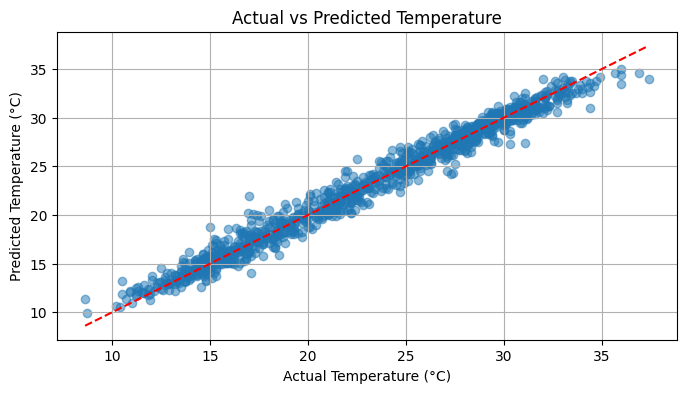

In [107]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test_temp, y_pred_temp, alpha=0.5)
plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], 'r--')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.grid(True)
plt.show()


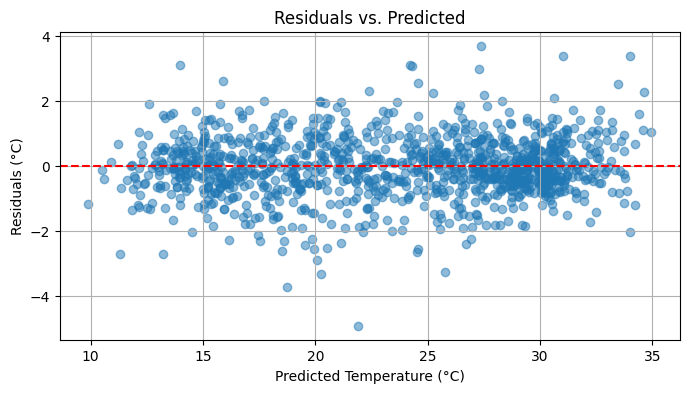

In [124]:
residuals = y_test_temp - y_pred_temp

plt.figure(figsize=(8, 4))
plt.scatter(y_pred_temp, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Temperature (°C)")
plt.ylabel("Residuals (°C)")
plt.title("Residuals vs. Predicted")
plt.grid(True)
plt.show()



# Quantum models

In [109]:
!pip install pennylane
!pip install qiskit  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 53.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 58.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.4 MB/s eta 0:00:00


In [110]:
pip install qiskit qiskit-machine-learning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 91.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 36.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.1.1
    Uninstalling qiskit-2.1.1:
      Successfully uninstalled qiskit-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.

In [114]:
!pip install qiskit-aer --no-cache-dir

